In [1]:
import numpy as np
import pandas as pd
from glob import glob
from os.path import join, dirname, basename
import matplotlib.pyplot as plt

In [12]:
wx_dir = '../../data/wx_station/banner/monthly'
wx_fs = glob(join(wx_dir, '*'))
df = pd.DataFrame()
for fp in wx_fs:
    df = df.append(pd.read_csv(fp, skiprows=3), ignore_index= True)
df.Date = pd.to_datetime(df.Date)
df = df.set_index(df.Date)
# df = df[df.index > pd.to_datetime('2021-11-01')]
df.loc[:, 'SWE_m'] = df['WTEQ.I-1 (in) ']*0.0254
df.loc[:, 'SD_m'] = df['SNWD.I-1 (in) ']*0.0254
df = df.drop_duplicates()
df = df.sort_index()

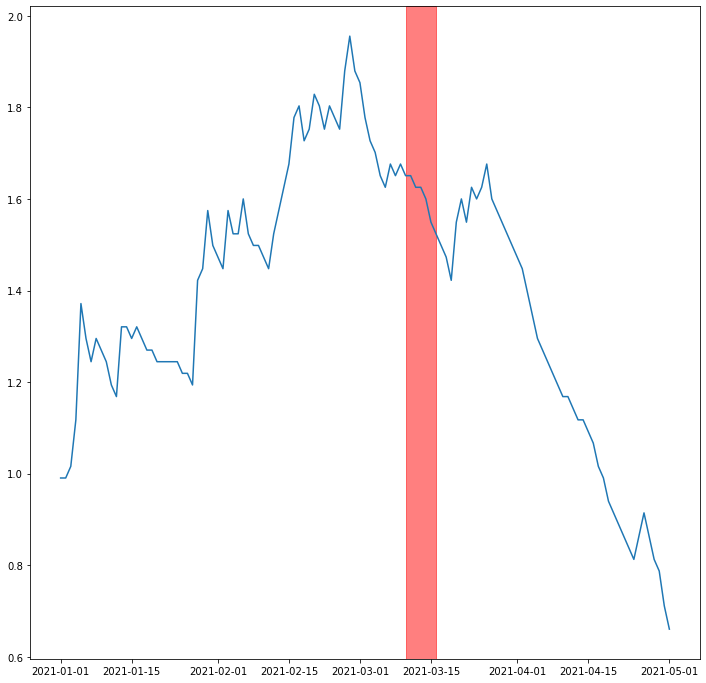

In [25]:
f, ax = plt.subplots(figsize=(12,12))
plt.plot(df.index, df.SD_m)
ax.axvspan(pd.to_datetime('2021-03-10'), pd.to_datetime('2021-03-16'), alpha=0.5, color='red')